# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("balanced_spam_data.csv", encoding = "ISO-8859-1")

# Data Cleaning

In [3]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [4]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

In [5]:
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop,inplace=True, axis=1)

In [6]:
data

sms labels
0     Good afternoon starshine! How's my boytoy? Doe...    ham
1     My sis is catching e show in e afternoon so i'...    ham
2                                What happened to date?    ham
3                              K:)k.are you in college?    ham
4                           S but mostly not like that.    ham
...                                                 ...    ...
2983  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986  Urgent UR awarded a complimentary trip to Euro...   spam
2987                               Where r we converge?    ham

[2988 rows x 2 columns]

In [7]:
def clean_text(text):
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [lemmatizer.lemmatize(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [8]:
data['sms'] = data['sms'].apply(clean_text)

In [9]:
data

sms labels
0     good afternoon starshine hows boytoy crave yet...    ham
1     si catching e show e afternoon im watching w c...    ham
2                                         happened date    ham
3                                         kkare college    ham
4                                           mostly like    ham
...                                                 ...    ...
2983  mob every week txt nokia txting get tell mate ...   spam
2984  sm ac sptv new jersey devil detroit red wing p...   spam
2985  urgent please call abta complimentary spanish ...   spam
2986  urgent ur awarded complimentary trip eurodisin...   spam
2987                                         r converge    ham

[2988 rows x 2 columns]

In [10]:
data.columns = ['text','label']

In [11]:
final_data = data

In [12]:
final_data.groupby('label').describe().T

label                         ham  \
text count                   1494   
     unique                  1448   
     top     sorry ill call later   
     freq                       5   

label                                                     spam  
text count                                                1494  
     unique                                               1242  
     top     u secret admirer looking make contact ufind rr...  
     freq                                                    9

In [13]:
final_data

text label
0     good afternoon starshine hows boytoy crave yet...   ham
1     si catching e show e afternoon im watching w c...   ham
2                                         happened date   ham
3                                         kkare college   ham
4                                           mostly like   ham
...                                                 ...   ...
2983  mob every week txt nokia txting get tell mate ...  spam
2984  sm ac sptv new jersey devil detroit red wing p...  spam
2985  urgent please call abta complimentary spanish ...  spam
2986  urgent ur awarded complimentary trip eurodisin...  spam
2987                                         r converge   ham

[2988 rows x 2 columns]

final_data.to_csv('cleaned_data.csv', index=False)

## Data Visualization using word cloud

In [14]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


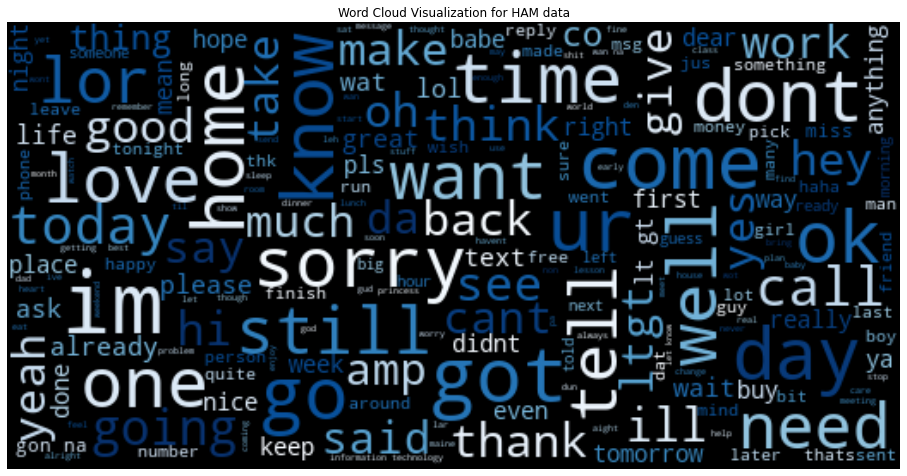

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
# Get all the ham and spam emails
ham_msg = final_data[final_data.label =='ham']
spam_msg = final_data[final_data.label=='spam']

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.text.to_numpy().tolist())

# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("Word Cloud Visualization for HAM data")
plt.savefig('results/ham_word_cloud.jpg')
plt.show()


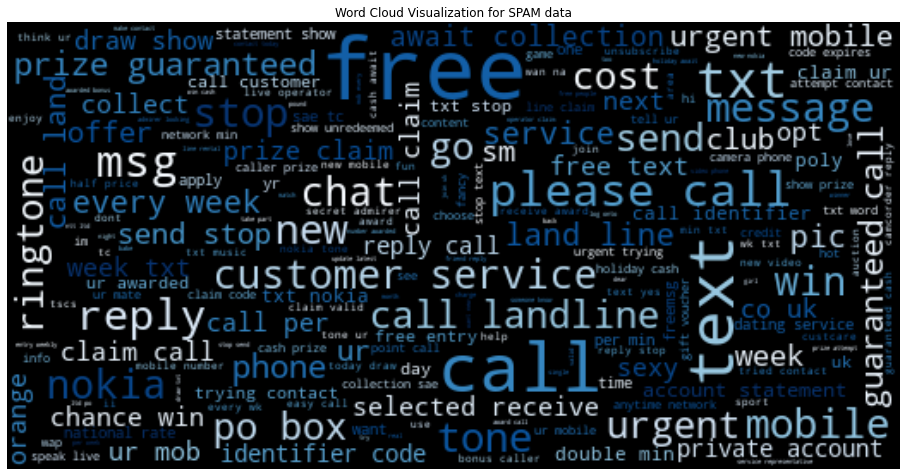

In [16]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.title("Word Cloud Visualization for SPAM data")
plt.savefig('results/spam_word_cloud.jpg')
plt.show()


In [17]:
X = final_data.loc[:, 'text']
Y = final_data.loc[:, 'label']

X11 X21 X31 Y1
X12 X22 X32 Y2
. .. .. . . .
.... ......
X1(1k) X2 (1k) .. Y (1k)

X1new X2new X3new Ynew


W1X1new + w2X2new + W3X3new + (B)Bias = Ynew  --> (w1,w2,w3)Weights


Weights , Bias (parameter)
Epoch, Batch size, Loss Function , Optimization Algorithm (Hyperparameter)


In [18]:
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_labels, y_test_labels = train_test_split(X,Y, 
                                                    test_size=0.2, random_state = 2)

dy/dx Loss function --- d(Loss Function)/d(weights)
[2]
[2]
[3]
Training set:
Please call me.   ham
You have won a lottery. spam
Call me . You won a lottery.
testing set
Congratulation-[UNK], you won a lottery.

In [19]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


max_sequence_length = 38

tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(X_train_data.values)

vocab_length = len(tokenizer.word_index) #len(tok.word_counts) or len(tok.index_word.keys()) will also give same results
print('No. of unique tokens(vocab_size): ', vocab_length)

X_train_sequences = tokenizer.texts_to_sequences(X_train_data.values)
X_test_sequences = tokenizer.texts_to_sequences(X_test_data.values)
print('No of sequences:', len(X_train_sequences)) #No of sequences will be same as the number of training samples
print(X_train_sequences[:2])

#make all sequences of equal length
X_train = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(X_test_sequences, maxlen=max_sequence_length)
X_train[:2]

No. of unique tokens(vocab_size):  4522
No of sequences: 2390
[[166, 444, 309], [166, 349, 377, 326, 8]]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 166, 444, 309],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 166, 349, 377, 326,   8]],
      dtype=int32)

In [20]:
import pickle
# saving
with open('models/lstm_tokenizer_balanced.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train_labels)
y_test = Encoder.fit_transform(y_test_labels)

In [22]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2390, 38), (2390,), (598, 38), (598,))

spam [0]
ham []

In [23]:
from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard


model = Sequential()
model.add(Embedding(41, 50, input_length=20))
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(50, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(50, activation="tanh"))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1, activation="sigmoid"))

In [24]:
def create_model(vocab_len=vocab_length, max_seq_len = max_sequence_length):
    inputs = Input(name='inputs', shape=[max_seq_len])   #None, 150
    layer = Embedding(vocab_length + 1, 50, input_length=max_seq_len)(inputs) #None, 150, 50
    layer = LSTM(64)(layer)  #None, 64
    layer = Dense(256,name='FC1')(layer) #None, 256
    layer = Activation('relu')(layer) #None, 256
    layer = Dropout(0.5)(layer) #None, 256
    layer = Dense(128,name='FC2')(layer) #None, 256
    layer = Activation('relu')(layer) #None, 256
    layer = Dropout(0.5)(layer) #None, 256
    layer = Dense(1,name='out_layer')(layer) #None, 1
    layer = Activation('sigmoid')(layer) #None, 1
    model = Model(inputs=inputs,outputs=layer)
    model.compile(loss='binary_crossentropy',optimizer=RMSprop(), metrics=['acc'])
    return model

model = create_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 38)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 38, 50)            226150    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
FC2 (Dense)                  (None, 128)              

In [25]:
filepath='models/LSTM_spam_model_balanced.h5'
callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1),
             ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, verbose=1),
            ]

In [26]:
import time
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=callbacks)
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 0.5647 - acc: 0.7547
Epoch 00001: val_loss improved from inf to 0.36796, saving model to models/LSTM_spam_model_balanced.h5
15/15 [==============================] - 2s 104ms/step - loss: 0.5647 - acc: 0.7547 - val_loss: 0.3680 - val_acc: 0.8452
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.2027 - acc: 0.9315
Epoch 00002: val_loss improved from 0.36796 to 0.17772, saving model to models/LSTM_spam_model_balanced.h5
15/15 [==============================] - 1s 35ms/step - loss: 0.2027 - acc: 0.9315 - val_loss: 0.1777 - val_acc: 0.9435
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.0898 - acc: 0.9733
Epoch 00003: val_loss improved from 0.17772 to 0.14433, saving model to models/LSTM_spam_model_balanced.h5
15/15 [==============================] - 1s 40ms/step - loss: 0.0898 - acc: 0.9733 - val_loss: 0.1443 - val_acc: 0.9414
Epoch 4/20
15/15 [==============================] - ETA

In [27]:
training_time

13.71354079246521

In [28]:
history.history

{'loss': [0.5647373795509338,
  0.20265202224254608,
  0.08977001160383224,
  0.052181605249643326,
  0.03727545216679573,
  0.022027745842933655,
  0.015319738537073135,
  0.010184221900999546,
  0.006545341573655605],
 'acc': [0.7547070980072021,
  0.9314853549003601,
  0.9733263850212097,
  0.9879707098007202,
  0.9884937405586243,
  0.9932008385658264,
  0.9952929019927979,
  0.9984309673309326,
  0.9989539980888367],
 'val_loss': [0.36795976758003235,
  0.17771866917610168,
  0.14432688057422638,
  0.11660344898700714,
  0.1193157285451889,
  0.13017329573631287,
  0.12796422839164734,
  0.15169976651668549,
  0.16200871765613556],
 'val_acc': [0.8451882600784302,
  0.9435146450996399,
  0.9414225816726685,
  0.9539749026298523,
  0.9623430967330933,
  0.9623430967330933,
  0.9644351601600647,
  0.9456067085266113,
  0.9623430967330933]}

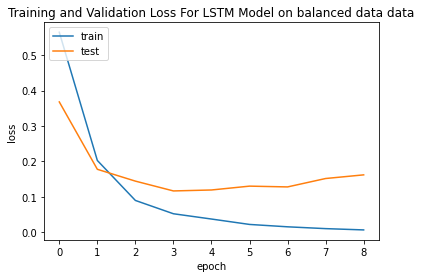

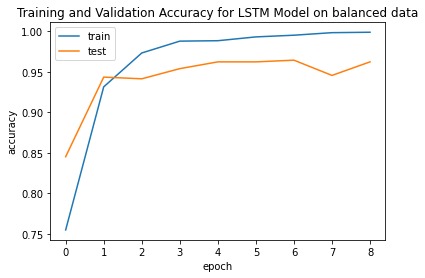

In [29]:
history_dict = history.history

# summarize history for loss
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Training and Validation Loss For LSTM Model on balanced data data')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results/training_and_validation_loss_plot_LSTM_balanced_data.jpg')
plt.show()

# summarize history for accuracy
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Training and Validation Accuracy for LSTM Model on balanced data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('results/training_and_validation_accuracy_plot_LSTM._balanced_data.jpg')
plt.show()

In [30]:
loaded_model = load_model('models/LSTM_spam_model_balanced.h5')
test_loss, test_acc = accr = loaded_model.evaluate(X_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(test_loss, test_acc))

19/19 [==============================] - 0s 4ms/step - loss: 0.0981 - acc: 0.9666
Test set
  Loss: 0.098
  Accuracy: 0.967


In [31]:
# make class predictions with the model on new data
y_pred_probability = loaded_model.predict(X_test)

In [32]:
y_pred_probability

array([[9.99997258e-01],
       [9.99965191e-01],
       [9.99981642e-01],
       [9.99946833e-01],
       [9.99994636e-01],
       [2.96857953e-03],
       [1.87651813e-02],
       [9.99699831e-01],
       [1.22640431e-02],
       [9.91277575e-01],
       [1.39027834e-03],
       [9.98576880e-01],
       [9.99936044e-01],
       [1.94525719e-03],
       [6.52334094e-03],
       [9.99936819e-01],
       [1.27463996e-01],
       [2.21129954e-02],
       [8.46672058e-03],
       [3.00079584e-03],
       [6.22847676e-03],
       [3.25334072e-03],
       [1.61616206e-02],
       [7.32243061e-04],
       [9.99989629e-01],
       [2.81453133e-03],
       [3.52098644e-02],
       [9.99612153e-01],
       [3.81871164e-02],
       [9.99903738e-01],
       [9.99993086e-01],
       [1.66335404e-02],
       [9.51227784e-01],
       [5.86730242e-03],
       [9.99917984e-01],
       [2.46325135e-03],
       [1.28579140e-03],
       [9.99994636e-01],
       [9.99993920e-01],
       [9.99908626e-01],


In [33]:
y_pred = y_pred_probability.tolist()

In [34]:
lstm_predictions = []
for pred in y_pred:
    if pred[0] < 0.5:
        lstm_predictions.append(0)
    else:
        lstm_predictions.append(1)


In [35]:
for i in range(30):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), lstm_predictions[i], y_test[i]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23, 2, 83, 267, 636, 97, 19, 172, 121, 145, 87, 98, 77, 733] => 1 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 91, 20, 1563, 1251, 132, 26, 99, 375, 1419, 30, 10, 7, 204, 10, 117, 98] => 1 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 204, 321, 4440, 4441, 11, 4442, 725, 4443, 438, 107, 36, 14, 7, 10, 10, 35, 4, 4444] => 1 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 466, 213, 229, 653, 29, 178, 365, 467, 237, 3, 27, 755, 918, 1902, 1346, 14, 7, 654, 1279] => 1 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2193, 175, 33, 152, 230, 63, 55, 13, 41, 2, 12, 118, 123] => 1 (expected 1)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 3711, 596, 907, 2381, 58, 306, 48, 2622, 800, 44, 489, 3624] => 0 (expected 0)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Appending LSTM predictions in  result testing data file

In [36]:
test_result_data = pd.read_csv("results/test_result_data_with_SVM_NaiveBayes_balanced.csv")
test_result_data['LSTM prediction'] = lstm_predictions
test_result_data.to_csv("results/test_result_data_with_SVM_NaiveBayes_LSTM_balanced.csv")

In [37]:
from sklearn.metrics import  confusion_matrix, classification_report
confusion_matrix(y_test, lstm_predictions)


array([[292,  10],
       [ 10, 286]])

In [38]:
classification_report(y_test,lstm_predictions)


'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97       302\n           1       0.97      0.97      0.97       296\n\n    accuracy                           0.97       598\n   macro avg       0.97      0.97      0.97       598\nweighted avg       0.97      0.97      0.97       598\n'

## Visualizing evaluation metrics

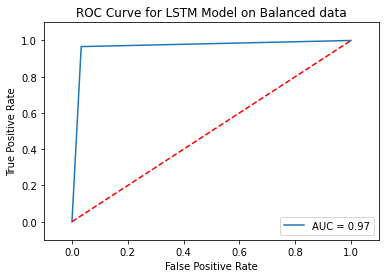

In [39]:
import matplotlib.pyplot as plt
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_test, lstm_predictions)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve for LSTM Model on Balanced data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/lstm_roc_balanced.jpg')
plt.show()


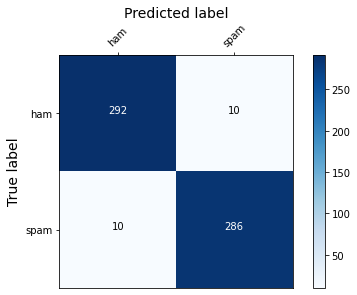

In [40]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,lstm_predictions)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.savefig('results/lstmconfusion_matrix_balanced.jpg')
plt.show()
